In [1]:
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere 
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
    
import datetime as dt  # for dealing with times

In [2]:
#URL for binance API
root_url = 'https://api.binance.com/api/v1/klines'

In [3]:
#function to pull data from binance API
def get_bars(symbol, interval = '1d'):
    url = root_url + '?symbol=' + symbol + '&interval=' + interval
    data = json.loads(requests.get(url).text)
    df = pd.DataFrame(data)
    df.columns = ['open_time',
                 'open', 'high', 'low', 'close', 'volume',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
    df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
    df = df[[ 'open', 'high', 'low', 'close', 'volume', 'num_trades']]
    return df

#### Currency Sector

In [4]:
coins = []
#creates Bitcoin Dataframe
btcusdt = get_bars('BTCUSDT')
#creates Bitcoin Cash Dataframe
bchusdt = get_bars('BCHUSDT')
#creates Litcoin Dataframe
ltcusdt = get_bars('LTCUSDT')
btcclose = btcusdt.close.astype(float)
bchclose = bchusdt.close.astype(float)
ltcclose = ltcusdt.close.astype(float)
coins.extend([btcclose, bchclose, ltcclose])


#### Infrastructure Sector

In [5]:
#creates Etherium Dataframe
ethusdt = get_bars('ETHUSDT')
#creates Cardano Dataframe
adausdt = get_bars('ADAUSDT')
#creates EOS Dataframe
eosusdt = get_bars('EOSUSDT')
ethclose = ethusdt.close.astype(float)
adaclose = adausdt.close.astype(float)
eosclose = eosusdt.close.astype(float)
coins.extend([ethclose, adaclose, eosclose])


#### Financial Sector

In [6]:
#creates Chainlink Dataframe
linkusdt = get_bars('LINKUSDT')
#creates BNB Dataframe
bnbusdt = get_bars('BNBUSDT')
#creates 0x Dataframe
zrxusdt = get_bars('ZRXUSDT')
linkclose = linkusdt.close.astype(float)
bnbclose = bnbusdt.close.astype(float)
zrxclose = zrxusdt.close.astype(float)
coins.extend([linkclose, bnbclose, zrxclose])


#### Services Sector

In [7]:
#creates Numeraire Dataframe
nmrusdt = get_bars('NMRUSDT')
#creates Enjin Coin Dataframe
enjusdt = get_bars('ENJUSDT')
#creates Siacoin Dataframe
scusdt = get_bars('SCUSDT')
nmrclose = nmrusdt.close.astype(float)
enjclose = enjusdt.close.astype(float)
scclose = scusdt.close.astype(float)
coins.extend([nmrclose, enjclose, scclose])


#### Media and Entertainment Sector

In [8]:
#creates Basic Attention Dataframe
batusdt = get_bars('BATUSDT')
#creates Steem Dataframe
steembtc = get_bars('STEEMBTC')
#convert from steem/btc to steem/usd 
# steembtc[['open', 'high', 'low', 'close']].astype('float') * btcusdt[['open', 'high', 'low', 'close']].astype('float')
steemusdt = steembtc[['open', 'high', 'low', 'close']].astype('float') * btcusdt[['open', 'high', 'low', 'close']].astype('float')
#creates Fun Fair Dataframe
funusdt = get_bars('FUNUSDT')
batclose = batusdt.close.astype(float)
steemclose = steemusdt.close.astype(float)
funclose = funusdt.close.astype(float)
coins.extend([batclose, steemclose, funclose])
coins

[2019-06-30 18:59:59.999    10854.10
 2019-07-01 18:59:59.999    10624.93
 2019-07-02 18:59:59.999    10842.85
 2019-07-03 18:59:59.999    11940.00
 2019-07-04 18:59:59.999    11145.67
                              ...   
 2020-11-06 17:59:59.999    15579.92
 2020-11-07 17:59:59.999    14818.30
 2020-11-08 17:59:59.999    15475.10
 2020-11-09 17:59:59.999    15328.41
 2020-11-10 17:59:59.999    15370.96
 Name: close, Length: 500, dtype: float64,
 2019-11-28 17:59:59.999    217.41
 2019-11-29 17:59:59.999    224.00
 2019-11-30 17:59:59.999    217.45
 2019-12-01 17:59:59.999    214.36
 2019-12-02 17:59:59.999    213.67
                             ...  
 2020-11-06 17:59:59.999    257.79
 2020-11-07 17:59:59.999    253.91
 2020-11-08 17:59:59.999    270.80
 2020-11-09 17:59:59.999    264.27
 2020-11-10 17:59:59.999    264.66
 Name: close, Length: 349, dtype: float64,
 2019-06-30 18:59:59.999    123.25
 2019-07-01 18:59:59.999    123.17
 2019-07-02 18:59:59.999    118.77
 2019-07-03 18:59

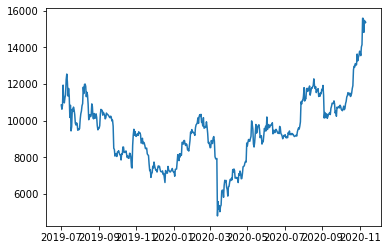

In [9]:
#BINANCE BTC PLOT
plt.plot(btcclose)
plt.show()

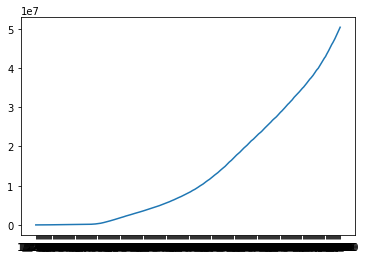

In [10]:
#GLOBAL CONFIRMED COVID CASES PLOT
global_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
gc_df = pd.read_csv(global_cases_url, error_bad_lines=False)
plt.plot(gc_df.iloc[0:, 4:].sum(axis=0))
# print(gc_df.iloc[0:, 4:-].sum(axis=0))


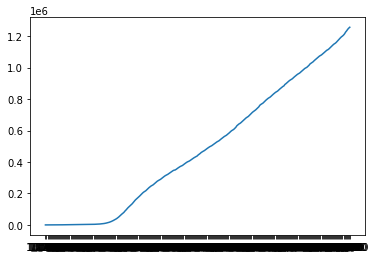

In [11]:
#GLOBAL CONFIRMED COVID DEATHS PLOT
global_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
gd_df = pd.read_csv(global_deaths_url, error_bad_lines=False)
plt.plot(gd_df.iloc[0:, 4:].sum(axis=0))

In [12]:
#DATASET OF BTC AND COVID CASES FROM 1/22 TO YESTERDAY
confirmed_cases = gc_df.iloc[0:, 4:].sum(axis=0).shift(1)
confirmed_cases[0] = 0


# binance = exchange_map["binance"][1].iloc[209:-7]
# print(binance)
# print(exchange_map["binance"][0][-8]) 

# binance_shifted = binance.shift(1)
# binance_shifted.iloc[0] = 0


In [13]:
stringency_df = pd.read_csv('/Users/daniellicht/Downloads/covid-stringency-index.csv')

In [14]:
from collections import defaultdict

In [15]:
date_to_aggregate_score = {}#defaultdict(list)
for i in range(0, len(stringency_df)):
    if stringency_df.iloc[i].Date in date_to_aggregate_score:
        date_to_aggregate_score[stringency_df.iloc[i].Date][0]+=stringency_df.iloc[i]["Stringency Index (OxBSG)"]
        date_to_aggregate_score[stringency_df.iloc[i].Date][1]+=1
    else:
        date_to_aggregate_score[stringency_df.iloc[i].Date]=[stringency_df.iloc[i]["Stringency Index (OxBSG)"], 1]


In [16]:
date_to_avg = {}
for date in date_to_aggregate_score:
    date_to_avg[date]=date_to_aggregate_score[date][0]/date_to_aggregate_score[date][1]


In [17]:
import numpy as np
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, LSTM, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
#RNN FOR DOW JONES INDEX CASES AS PREDICTOR FOR BTC PRICE
import yfinance as yf
import time
from datetime import date, timedelta

284


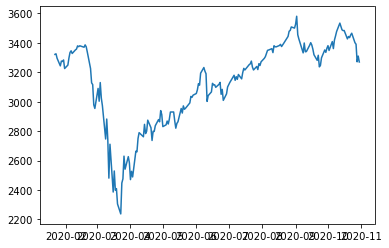

In [72]:
dji = yf.Ticker("^GSPC")
# dji.info
dow = dji.history(interval="1d", start="2020-01-22", end="2020-10-31").Close
#PLOT OF DJI
plt.plot(dow)
num_days = 284
date_index = pd.date_range(date(2020, 1, 22), periods=num_days, freq='D')
print(len(date_index))
dow = dow.reindex(index=date_index)
dow = dow.shift(1)
dow.iloc[0] = 0


In [64]:
global_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
gc_df = pd.read_csv(global_cases_url, error_bad_lines=False)
covid_cases = gc_df.iloc[0:, 4:].sum(axis=0)
covid_cases = covid_cases.shift(1)
covid_cases.iloc[0] = 0
covid_cases = covid_cases.iloc[:-8]
covid_cases = covid_cases.reindex(index=date_index)
covid_cases


2020-01-22           0.0
2020-01-23         555.0
2020-01-24         654.0
2020-01-25         941.0
2020-01-26        1434.0
                 ...    
2020-10-27    43481951.0
2020-10-28    43950859.0
2020-10-29    44459148.0
2020-10-30    45009936.0
2020-10-31    45579162.0
Freq: D, Length: 284, dtype: float64

In [84]:
names = ["BTC", "BCH", "LTC", "ETC", "ADA", "EOS", "LINK", "BNB", "ZRX", "NMR", "ENJ", "SC", "BAT", "STEEM", "FUN"]
for idx in range(len(coins)):
#     if len(coins[idx]) < 284:
    print(names[idx])
    print(len(coins[idx]))


BTC
500
BCH
349
LTC
500
ETC
500
ADA
500
EOS
500
LINK
500
BNB
500
ZRX
500
NMR
84
ENJ
500
SC
128
BAT
500
STEEM
500
FUN
442


In [90]:
#FILL MISSING DAILY VALUES WITH PREVIOUS DAY'S VAL
# binance = pd.Series(data = binance.values, index = date_index)
# binance_shifted = pd.Series(data = binance_shifted.values, index = date_index)
strin_vals = list(date_to_avg.values())[20:-5]
strin_vals[0]=0
stringency = pd.Series(data=strin_vals, index=date_index)
for idx in range(len(dow)):
    if np.isnan(dow[idx]):
        dow[idx] = dow[idx-1]
#'COVID Cases': covid_cases,
datasets = {}
for idx in range(len(names)):
    if names[idx]=='NMR' or names[idx]=='SC' or names[idx]=='BCH' or names[idx]=='FUN':
        continue
    coin_2020 = coins[idx][206:490]
    coin_2020.index=date_index   #.set_index(index=date_index)
    shifted_coin = coin_2020.shift(1)
    shifted_coin.iloc[0] = 0
    datasets[names[idx]] = pd.DataFrame({'Coin Shifted': shifted_coin, 'DJI': dow, 'Gov Stringency': stringency,  'Coin': coin_2020})
print(datasets)


{'BTC':             Coin Shifted          DJI  Gov Stringency      Coin
2020-01-22          0.00     0.000000        0.000000   8682.36
2020-01-23       8682.36  3321.750000        1.629243   8404.52
2020-01-24       8404.52  3325.540039        2.209892   8439.00
2020-01-25       8439.00  3295.469971        2.560324   8340.58
2020-01-26       8340.58  3295.469971        2.755514   8615.00
...                  ...          ...             ...       ...
2020-10-27      13052.19  3400.969971       52.048774  13636.17
2020-10-28      13636.17  3390.679932       51.908623  13266.40
2020-10-29      13266.40  3271.030029       51.280677  13455.70
2020-10-30      13455.70  3310.110107       51.288649  13560.10
2020-10-31      13560.10  3269.959961       53.291406  13791.00

[284 rows x 4 columns], 'LTC':             Coin Shifted          DJI  Gov Stringency   Coin
2020-01-22          0.00     0.000000        0.000000  58.33
2020-01-23         58.33  3321.750000        1.629243  54.52
2020-01-2

In [94]:
#RNN PREPROCESSING
dataset = datasets['BTC']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset.values)
inverted_X = scaler.inverse_transform(scaled)
inverted_X

# split into train and test sets
values = scaled

# datapoints = len(binance)
train_size = int(num_days*0.60)
test_size = num_days-train_size

train = values[:train_size, :]
test = values[train_size:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


In [104]:
#RNN ARCHITECTURE
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history


Epoch 1/150
11/11 - 0s - loss: 0.3692 - val_loss: 0.5915
Epoch 2/150
11/11 - 0s - loss: 0.2756 - val_loss: 0.4795
Epoch 3/150
11/11 - 0s - loss: 0.1943 - val_loss: 0.3772
Epoch 4/150
11/11 - 0s - loss: 0.1505 - val_loss: 0.2916
Epoch 5/150
11/11 - 0s - loss: 0.1191 - val_loss: 0.2175
Epoch 6/150
11/11 - 0s - loss: 0.1057 - val_loss: 0.1721
Epoch 7/150
11/11 - 0s - loss: 0.1041 - val_loss: 0.1755
Epoch 8/150
11/11 - 0s - loss: 0.1020 - val_loss: 0.1880
Epoch 9/150
11/11 - 0s - loss: 0.1004 - val_loss: 0.1835
Epoch 10/150
11/11 - 0s - loss: 0.0991 - val_loss: 0.1768
Epoch 11/150
11/11 - 0s - loss: 0.0982 - val_loss: 0.1774
Epoch 12/150
11/11 - 0s - loss: 0.0972 - val_loss: 0.1782
Epoch 13/150
11/11 - 0s - loss: 0.0960 - val_loss: 0.1747
Epoch 14/150
11/11 - 0s - loss: 0.0953 - val_loss: 0.1752
Epoch 15/150
11/11 - 0s - loss: 0.0942 - val_loss: 0.1726
Epoch 16/150
11/11 - 0s - loss: 0.0935 - val_loss: 0.1721
Epoch 17/150
11/11 - 0s - loss: 0.0927 - val_loss: 0.1708
Epoch 18/150
11/11 - 0s

Epoch 142/150
11/11 - 0s - loss: 0.0484 - val_loss: 0.0696
Epoch 143/150
11/11 - 0s - loss: 0.0478 - val_loss: 0.0669
Epoch 144/150
11/11 - 0s - loss: 0.0474 - val_loss: 0.0651
Epoch 145/150
11/11 - 0s - loss: 0.0471 - val_loss: 0.0646
Epoch 146/150
11/11 - 0s - loss: 0.0464 - val_loss: 0.0631
Epoch 147/150
11/11 - 0s - loss: 0.0459 - val_loss: 0.0616
Epoch 148/150
11/11 - 0s - loss: 0.0453 - val_loss: 0.0596
Epoch 149/150
11/11 - 0s - loss: 0.0448 - val_loss: 0.0580
Epoch 150/150
11/11 - 0s - loss: 0.0442 - val_loss: 0.0565


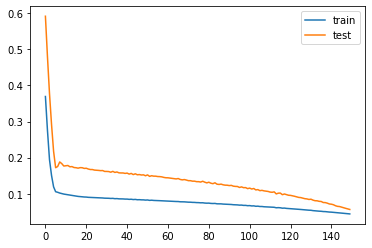

In [105]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [106]:
predictions = []
for i in range(len(dataset.values)):
    X, y = values[i, 0:-1], values[i, -1]
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=1)
    yhat = yhat[0,0]
    
    #invert scaler
    new_row = X[0][0]
    new_row = np.concatenate((new_row, [yhat]))
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    yhat = inverted[0, -1]
    yhat = yhat+dataset.values[-(len(dataset.values)-i)]
    predictions.append(yhat)
#     X, y = test[i, 0:-1], test[i, -1]
#     X = X.reshape(1, 1, len(X))
#     yhat = model.predict(X, batch_size=1)
#     yhat = yhat[0,0]
    
#     #invert scaler
#     new_row = X[0][0]
#     new_row = np.concatenate((new_row, [yhat]))
#     array = np.array(new_row)
#     array = array.reshape(1, len(array))
#     inverted = scaler.inverse_transform(array)
#     yhat = inverted[0, -1]
#     yhat = yhat+inverted_X[-(len(test)-i)]
#     predictions.append(yhat)


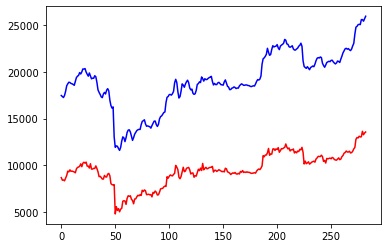

In [108]:
prediction_graph_vals = np.array([prediction[-1] for prediction in predictions])
prediction_graph_vals
plt.plot(inverted_X[1:,:-3], color='red')
plt.plot(prediction_graph_vals[1:], color='blue')
plt.show()